In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from tensorflow import keras

import json
import graphviz

In [2]:
animalData = pd.read_csv('train.csv')
animalData.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [3]:
petIDs = np.array(animalData["PetID"])
magnitude = []
score = []

# loop through IDs, do some math with the magnitudes and score and save that into a Numpy array, then add it to the animals Database
for id in petIDs:
  try: 
    with open("./train_sentiment/" + id + '.json') as json_file:
      itemData = json.load(json_file)
      magnitude.append(itemData["documentSentiment"]["magnitude"])
      score.append(itemData["documentSentiment"]["score"])
  except:
    magnitude.append(0.0)
    score.append(0.0)
    pass

jsonData = {"Magnitude" : magnitude, "Score" : score}
animalData = animalData.join(pd.DataFrame(data = jsonData))

In [4]:
predictors = animalData.drop(["Name", "State", "RescuerID", "Description", "PetID", "AdoptionSpeed", "VideoAmt", "PhotoAmt", "Breed1", "Breed2", "Color1", "Color2", "Color3"], axis = 1)
response = pd.DataFrame(animalData["AdoptionSpeed"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.25)

svcModel = LinearSVC()
svcModel.fit(X_train, y_train)

y_train_pred = svcModel.predict(X_train)
y_test_pred = svcModel.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svcModel.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", svcModel.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3247954464603344

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.32408642304614566



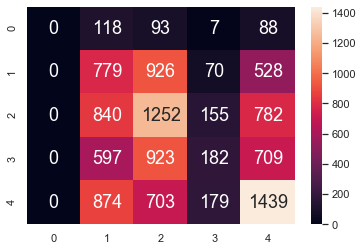

In [7]:
matrix = confusion_matrix(y_train, y_train_pred)
sb.heatmap(matrix, annot = True, fmt=".0f", annot_kws={"size": 18})

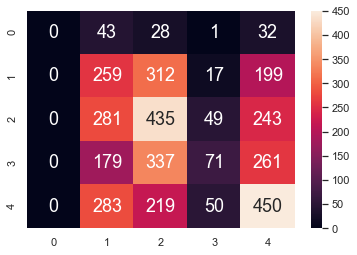

In [8]:
matrix = confusion_matrix(y_test, y_test_pred)
sb.heatmap(matrix, annot = True, fmt=".0f", annot_kws={"size": 18})

In [9]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape = (13,)),
    keras.layers.Dense(8, activation = "elu"),
    keras.layers.Dense(8, activation = "selu"),
    keras.layers.Dense(5, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [10]:
model.fit(X_train, y_train, epochs = 15)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test acc: ", test_acc)

Train on 11244 samples
Epoch 1/15
11244/11244 [==============================] - 0s 44us/sample - loss: 1.6975 - accuracy: 0.3027
Epoch 2/15
11244/11244 [==============================] - 0s 24us/sample - loss: 1.4351 - accuracy: 0.3491
Epoch 3/15
11244/11244 [==============================] - 0s 24us/sample - loss: 1.4243 - accuracy: 0.3526
Epoch 4/15
11244/11244 [==============================] - 0s 24us/sample - loss: 1.4205 - accuracy: 0.3577
Epoch 5/15
11244/11244 [==============================] - 0s 24us/sample - loss: 1.4179 - accuracy: 0.3601
Epoch 6/15
11244/11244 [==============================] - 0s 24us/sample - loss: 1.4152 - accuracy: 0.3566
Epoch 7/15
11244/11244 [==============================] - 0s 24us/sample - loss: 1.4136 - accuracy: 0.3601
Epoch 8/15
11244/11244 [==============================] - 0s 25us/sample - loss: 1.4127 - accuracy: 0.3642
Epoch 9/15
11244/11244 [==============================] - 0s 24us/sample - loss: 1.4137 - accuracy: 0.3603
Epoch 10/15
11

In [11]:
predictions = model.predict(X_train)
results = []

for prediction in predictions:
    results.append(np.argmax(prediction))

results = pd.DataFrame(np.array(results))

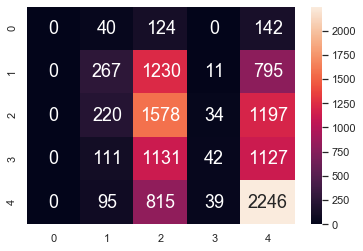

In [12]:
matrix = confusion_matrix(y_train, results)
sb.heatmap(matrix, annot = True, fmt=".0f", annot_kws={"size": 18})

In [13]:
predictions = model.predict(X_test)
results = []

for prediction in predictions:
    results.append(np.argmax(prediction))

results = pd.DataFrame(np.array(results))

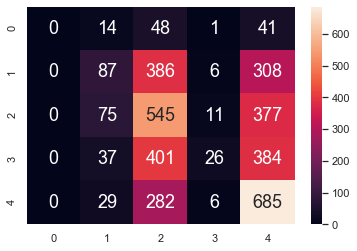

In [14]:
matrix = confusion_matrix(y_test, results)
sb.heatmap(matrix, annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.36490572749911065

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.35209389170445454



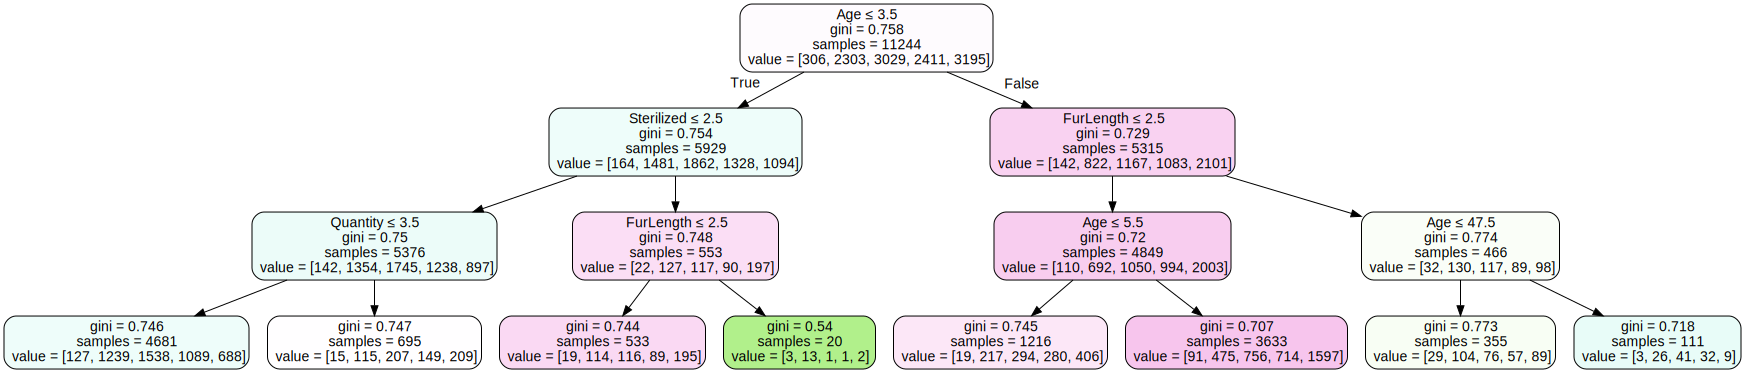

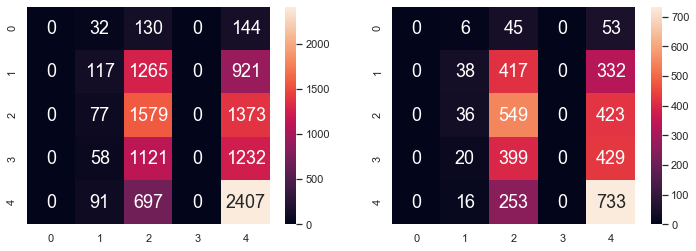

In [15]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
#max depth increases the number of variables to be considered, making the classification accuracy better

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)